In [98]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [99]:
#Cargar archivo csv
df = pd.read_csv("Venecia_Limpio.csv")
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44527,https://www.airbnb.com/rooms/44527,20250609011658,2025-06-17,city scrape,Luxury Historic Apartment on Calm Sunny Canal,An apartment that blends Gothic style with ini...,"Cannaregio is a well-connected, truly Venetian...",https://a0.muscache.com/pictures/d81fb136-a867...,120215,...,4.94,4.91,4.72,IT027042B4GR0PSZS4,f,2.0,2.0,0.0,0.0,0.87
1,47383,https://www.airbnb.com/rooms/47383,20250609011658,2025-06-17,city scrape,Ca' Barba B&B: room n102 (jacuzzi shower),"Ca' Barb B&B, a few steps away from Rialto bri...",San Polo is highly rated by guests for walking...,https://a0.muscache.com/pictures/hosting/Hosti...,214390,...,4.98,4.94,4.88,IT027042B4D3D4AUUS,t,4.0,1.0,0.0,0.0,2.31
2,49656,https://www.airbnb.com/rooms/49656,20250609011658,2025-06-17,city scrape,Ca' Foscari Apartment,It’s a lovely quiet newly restored flat within...,The apartment is on the first floor (second fl...,https://a0.muscache.com/pictures/41037529-8487...,226598,...,4.96,4.96,4.78,IT027042C2L6NZYNJR,t,2.0,2.0,0.0,0.0,0.89


In [100]:
# ============================
# DICCIONARIO DE VALORES CENTINELA
# ============================
sentinel_dict = {
    "description": "NO DESCRIPTION",
    "neighborhood_overview": "NO NEIGHBORHOOD_OVERVIEW",
    "picture_url": "NO PICTURE URL",
    "host_name": "NO HOST NAME",
    "host_location": "UNKNOWN",
    "host_about": "HOST ABOUT NOT PROVIDED",
    "host_thumbnail_url": "NO PROVIDED URL",
    "host_picture_url": "NO PROVIDED URL",
    "host_neighbourhood": "UNKNOWN",
    "host_response_time": "N/A",
    "license": "SL222222X2XX2XXXX2",

    # Variables numéricas y de estado
    "host_response_rate": 222,
    "host_acceptance_rate": 222,
    "host_is_superhost": "SIN_INFO",

    # Variables de reseñas
    "reviews_per_month": -222,
    "review_scores_rating": -222,
    "review_scores_accuracy": -222,
    "review_scores_cleanliness": -222,
    "review_scores_checkin": -222,
    "review_scores_communication": -222,
    "review_scores_location": -222,
    "review_scores_value": -222,

    # Fechas
    "first_review": pd.Timestamp("2222-01-01"),
    "last_review": pd.Timestamp("2222-01-01"),

}

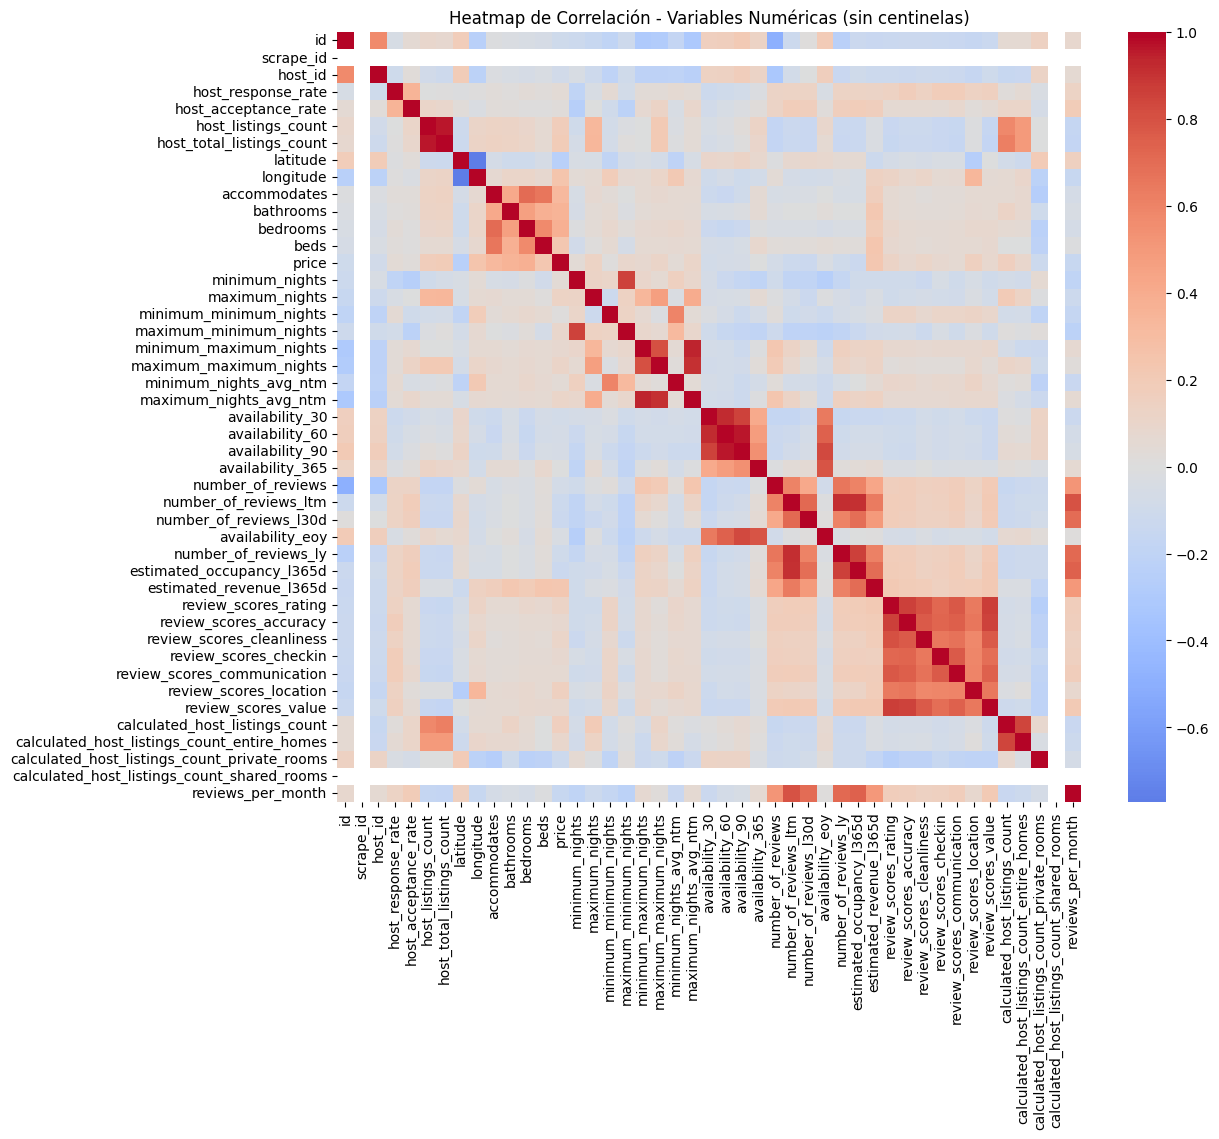


🔹 Top 10 correlaciones con 'host_response_rate':


,Variable,Correlación
0,host_acceptance_rate,0.354989
1,minimum_nights,-0.200014
2,review_scores_communication,0.188588
3,review_scores_checkin,0.178584
4,review_scores_accuracy,0.176297
5,review_scores_value,0.151244
6,review_scores_rating,0.141376
7,review_scores_location,0.140631
8,review_scores_cleanliness,0.138737
9,estimated_occupancy_l365d,0.134676



🔹 Top 10 correlaciones con 'host_acceptance_rate':


,Variable,Correlación
0,host_response_rate,0.354989
1,minimum_nights,-0.247931
2,maximum_minimum_nights,-0.221910
3,reviews_per_month,0.193829
4,estimated_occupancy_l365d,0.190021
5,number_of_reviews_ltm,0.184232
6,number_of_reviews_ly,0.169090
7,estimated_revenue_l365d,0.165454
8,number_of_reviews_l30d,0.164831
9,number_of_reviews,0.120020



🔹 Top 10 correlaciones con 'host_total_listings_count':


,Variable,Correlación
0,host_listings_count,0.960967
1,calculated_host_listings_count,0.616905
2,calculated_host_listings_count_entire_homes,0.490141
3,maximum_nights,0.342403
4,maximum_maximum_nights,0.208160
5,price,0.191560
6,number_of_reviews,-0.173788
7,review_scores_value,-0.170080
8,reviews_per_month,-0.169615
9,review_scores_communication,-0.159518



🔹 Top 10 correlaciones con 'accommodates':


,Variable,Correlación
0,bedrooms,0.705102
1,beds,0.657001
2,bathrooms,0.414471
3,price,0.328168
4,calculated_host_listings_count_private_rooms,-0.264054
5,estimated_revenue_l365d,0.168038
6,availability_60,-0.142042
7,host_total_listings_count,0.139642
8,host_listings_count,0.130722
9,availability_30,-0.120185



🔹 Top 10 correlaciones con 'reviews_per_month':


,Variable,Correlación
0,number_of_reviews_ltm,0.795793
1,estimated_occupancy_l365d,0.745389
2,number_of_reviews_ly,0.715451
3,number_of_reviews_l30d,0.696444
4,number_of_reviews,0.521699
5,estimated_revenue_l365d,0.506014
6,maximum_minimum_nights,-0.219759
7,review_scores_value,0.210227
8,minimum_nights,-0.198995
9,host_acceptance_rate,0.193829



🔹 Top 10 correlaciones con 'price':


,Variable,Correlación
0,bedrooms,0.377667
1,bathrooms,0.351666
2,accommodates,0.328168
3,longitude,0.244822
4,latitude,-0.243606
5,beds,0.227832
6,estimated_revenue_l365d,0.227036
7,host_total_listings_count,0.191560
8,host_listings_count,0.171359
9,calculated_host_listings_count,0.162297


In [101]:
# -------------------------------------------------------------------
# HEATMAP + TOP 10 CORRELACIONES (con exclusión de centinelas)
# -------------------------------------------------------------------

# Filtrar solo columnas numéricas
df_num = df.select_dtypes(include=[np.number]).copy()

# --- EXCLUSIÓN DE VALORES CENTINELA ---
if "sentinel_dict" in globals():
    for col in df_num.columns:
        if col in sentinel_dict:
            df_num = df_num[df_num[col] != sentinel_dict[col]]
# --------------------------------------

# Matriz de correlación
corr_matrix = df_num.corr()

# --- HEATMAP DE CORRELACIÓN ---
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Heatmap de Correlación - Variables Numéricas (sin centinelas)")
plt.show()

# --- TOP 10 DE CORRELACIONES PARA CADA VARIABLE OBJETIVO ---
target_vars = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_total_listings_count',
    'accommodates',
    'reviews_per_month',
    'price'
]

for var in target_vars:
    if var in corr_matrix.columns:
        print(f"\n🔹 Top 10 correlaciones con '{var}':")
        top_corr = corr_matrix[var].abs().sort_values(ascending=False)[1:11]
        display(pd.DataFrame({
            'Variable': top_corr.index,
            'Correlación': corr_matrix[var][top_corr.index].values
        }))
    else:
        print(f"\n⚠️ La variable '{var}' no se encuentra en el DataFrame numérico.")



📈 Modelo lineal: host_response_rate ~ host_acceptance_rate
   Correlación: 0.3550
                            OLS Regression Results                            
Dep. Variable:     host_response_rate   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     977.0
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          1.77e-200
Time:                        22:34:03   Log-Likelihood:                 8651.1
No. Observations:                6778   AIC:                        -1.730e+04
Df Residuals:                    6776   BIC:                        -1.728e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

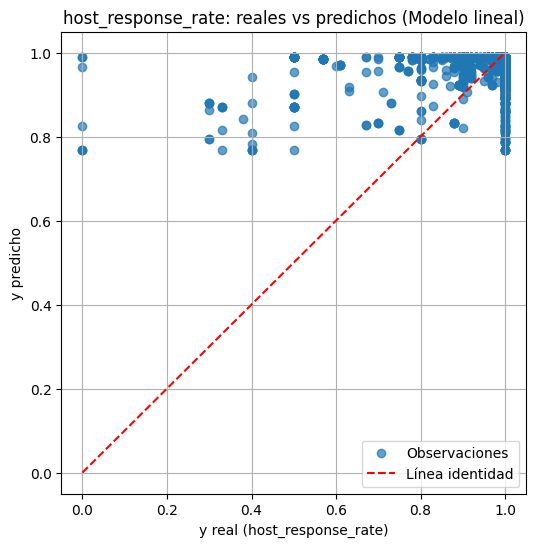

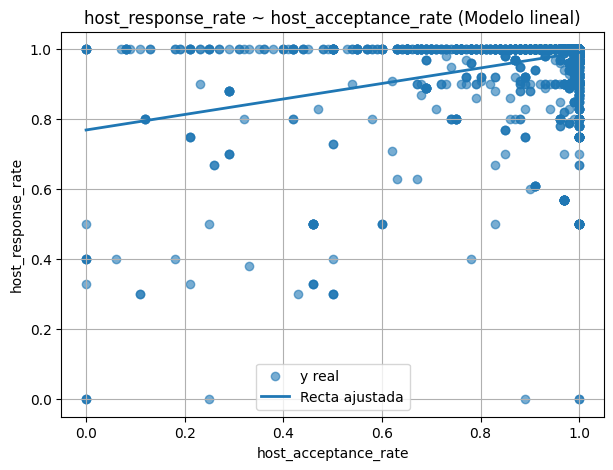


📈 Modelo lineal: host_acceptance_rate ~ host_response_rate
   Correlación: 0.3550
                             OLS Regression Results                             
Dep. Variable:     host_acceptance_rate   R-squared:                       0.126
Model:                              OLS   Adj. R-squared:                  0.126
Method:                   Least Squares   F-statistic:                     977.0
Date:                  Tue, 07 Oct 2025   Prob (F-statistic):          1.77e-200
Time:                          22:34:04   Log-Likelihood:                 5455.2
No. Observations:                  6778   AIC:                        -1.091e+04
Df Residuals:                      6776   BIC:                        -1.089e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------

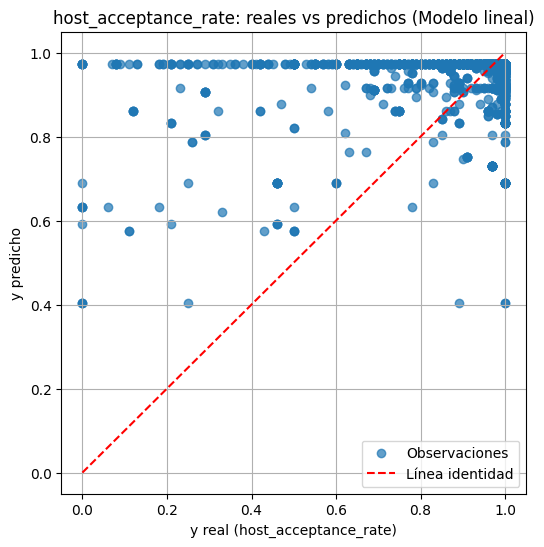

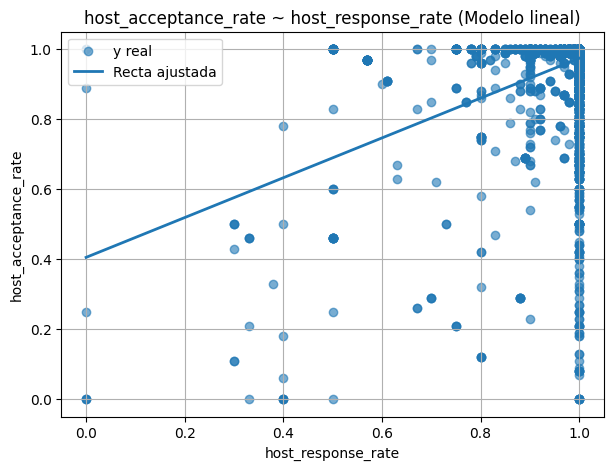


📈 Modelo lineal: host_total_listings_count ~ host_listings_count
   Correlación: 0.9610
                                OLS Regression Results                               
Dep. Variable:     host_total_listings_count   R-squared:                       0.923
Model:                                   OLS   Adj. R-squared:                  0.923
Method:                        Least Squares   F-statistic:                 8.948e+04
Date:                       Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                               22:34:04   Log-Likelihood:                -26745.
No. Observations:                       7419   AIC:                         5.349e+04
Df Residuals:                           7417   BIC:                         5.351e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          

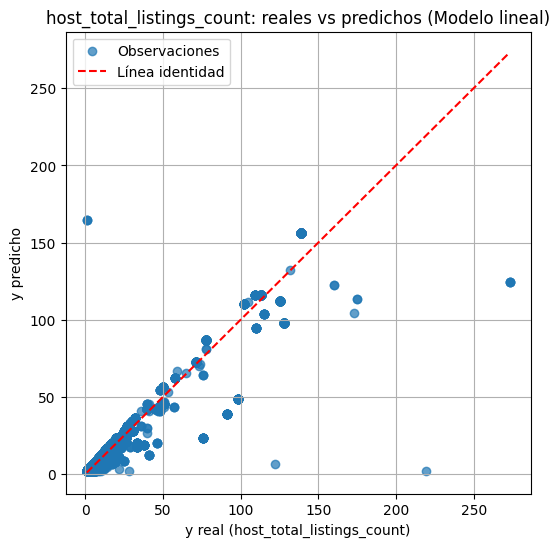

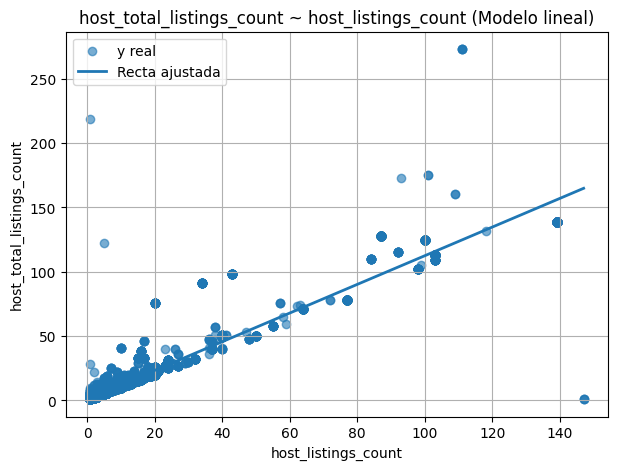


📈 Modelo lineal: accommodates ~ bedrooms
   Correlación: 0.7051
                            OLS Regression Results                            
Dep. Variable:           accommodates   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     7333.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:34:04   Log-Likelihood:                -11366.
No. Observations:                7419   AIC:                         2.274e+04
Df Residuals:                    7417   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

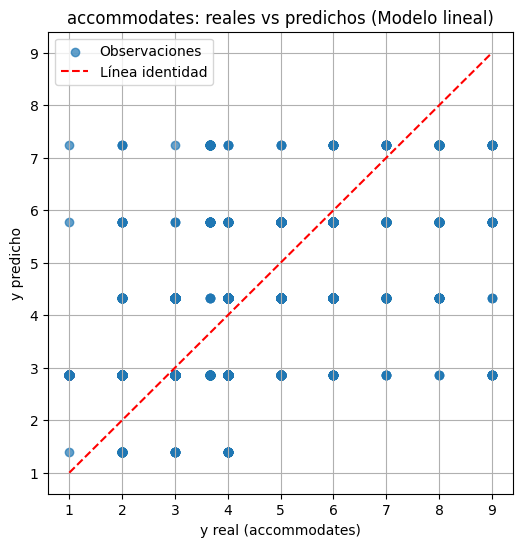

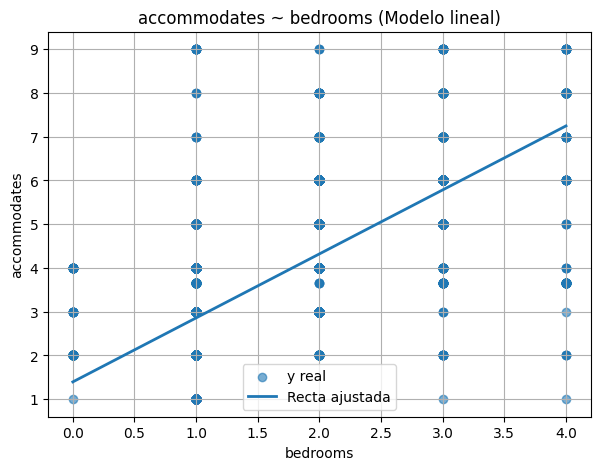


📈 Modelo lineal: reviews_per_month ~ number_of_reviews_ltm
   Correlación: 0.7958
                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                 1.281e+04
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:34:05   Log-Likelihood:                -10627.
No. Observations:                7419   AIC:                         2.126e+04
Df Residuals:                    7417   BIC:                         2.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

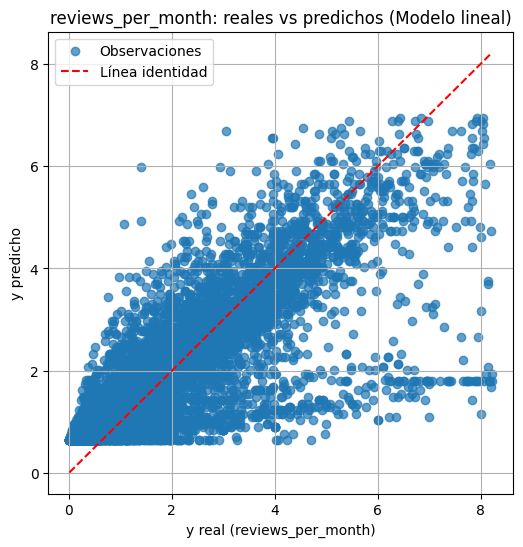

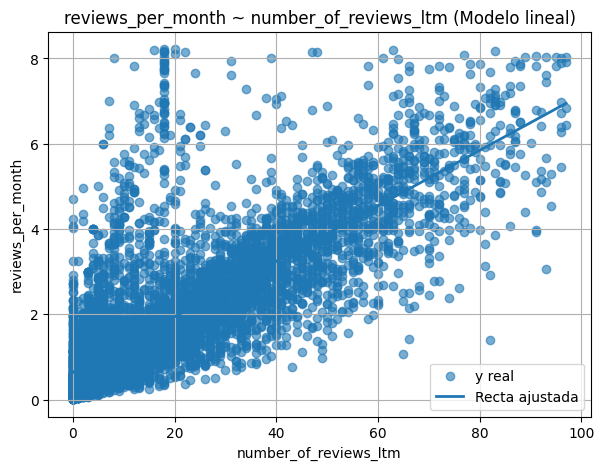


📈 Modelo lineal: price ~ bedrooms
   Correlación: 0.3777
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     1234.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          3.46e-250
Time:                        22:34:05   Log-Likelihood:                -46637.
No. Observations:                7419   AIC:                         9.328e+04
Df Residuals:                    7417   BIC:                         9.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

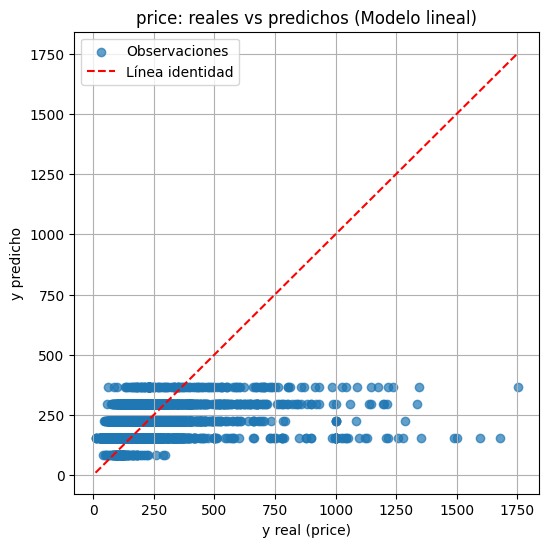

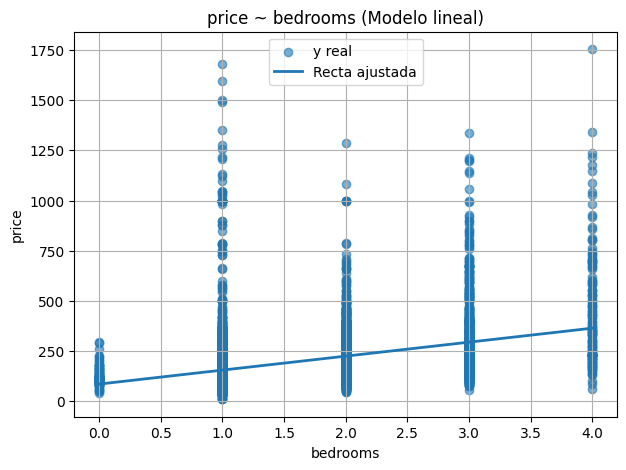

In [ ]:
# -------------------------------------------------------------------
# MODELO LINEAL: y = a*x + b
# -------------------------------------------------------------------

for y_col in target_vars:
    if y_col not in corr_matrix.columns:
        print(f"\n⚠️ La variable objetivo '{y_col}' no está en el DataFrame. Se omite.")
        continue

    # Predictor con mayor |correlación| (excluyendo la propia)
    top_x = corr_matrix[y_col].drop(y_col, errors='ignore').abs().idxmax()
    corr_val = corr_matrix.loc[y_col, top_x]

    print(f"\n======================================")
    print(f"📈 Modelo lineal: {y_col} ~ {top_x}")
    print(f"   Correlación: {corr_val:.4f}")
    print(f"======================================")

    # Subconjunto con las dos variables (desde df_num)
    sub = df_num[[y_col, top_x]].dropna().copy()

    # Exclusión de centinelas (por columna específica)
    if "sentinel_dict" in globals():
        if y_col in sentinel_dict:
            sub = sub[sub[y_col] != sentinel_dict[y_col]]
        if top_x in sentinel_dict:
            sub = sub[sub[top_x] != sentinel_dict[top_x]]

    if len(sub) < 3:
        print("⚠️ Insuficientes observaciones tras limpieza, se omite.")
        continue

    # Ajuste OLS
    X = sm.add_constant(sub[[top_x]])
    y = sub[y_col]
    modelo_lineal = sm.OLS(y, X, missing='drop').fit()
    print(modelo_lineal.summary())

    # Predicciones en las observaciones
    y_hat = modelo_lineal.predict(X)

    # ---------------------------
    # 1) Reales vs. predichos
    # ---------------------------
    plt.figure(figsize=(6, 6))
    plt.scatter(y, y_hat, alpha=0.7, label="Observaciones")
    lims = [min(y.min(), y_hat.min()), max(y.max(), y_hat.max())]
    plt.plot(lims, lims, 'r--', label="Línea identidad")
    plt.xlabel(f"y real ({y_col})")
    plt.ylabel("y predicho")
    plt.title(f"{y_col}: reales vs predichos (Modelo lineal)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------------------------
    # 2) Curva del modelo sobre x
    # ---------------------------
    x_plot = np.linspace(sub[top_x].min(), sub[top_x].max(), 300)
    X_plot = pd.DataFrame({
        "const": 1.0,
        top_x: x_plot
    })
    y_curve = modelo_lineal.predict(X_plot)

    plt.figure(figsize=(7, 5))
    plt.scatter(sub[top_x], sub[y_col], alpha=0.6, label='y real')
    plt.plot(x_plot, y_curve, linewidth=2, label='Recta ajustada')
    plt.xlabel(top_x)
    plt.ylabel(y_col)
    plt.title(f"{y_col} ~ {top_x} (Modelo lineal)")
    plt.grid(True)
    plt.legend()
    plt.show()



📈 Modelo cuadrático: host_response_rate ~ host_acceptance_rate² + host_acceptance_rate
   Correlación: 0.3550
                            OLS Regression Results                            
Dep. Variable:     host_response_rate   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     527.1
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          1.74e-213
Time:                        22:01:15   Log-Likelihood:                 8684.7
No. Observations:                6778   AIC:                        -1.736e+04
Df Residuals:                    6775   BIC:                        -1.734e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------

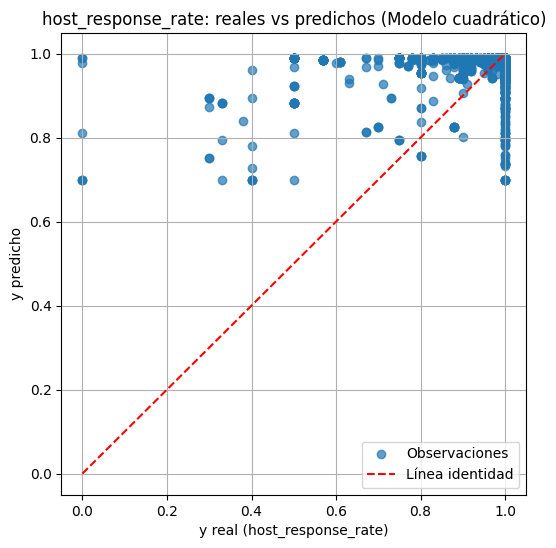

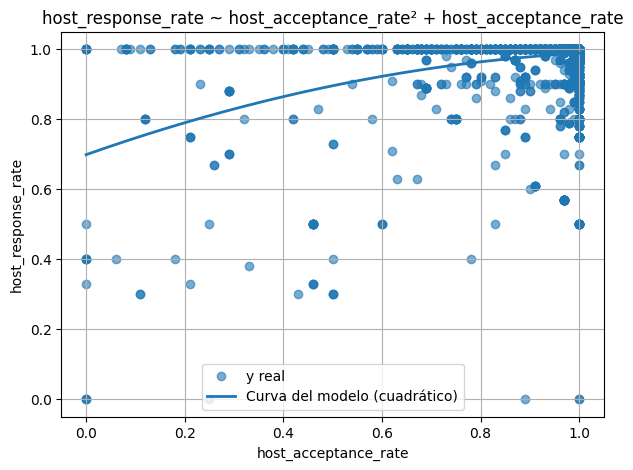


📈 Modelo cuadrático: host_acceptance_rate ~ host_response_rate² + host_response_rate
   Correlación: 0.3550
                             OLS Regression Results                             
Dep. Variable:     host_acceptance_rate   R-squared:                       0.130
Model:                              OLS   Adj. R-squared:                  0.130
Method:                   Least Squares   F-statistic:                     507.7
Date:                  Tue, 07 Oct 2025   Prob (F-statistic):          3.38e-206
Time:                          22:01:16   Log-Likelihood:                 5472.1
No. Observations:                  6778   AIC:                        -1.094e+04
Df Residuals:                      6775   BIC:                        -1.092e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025    

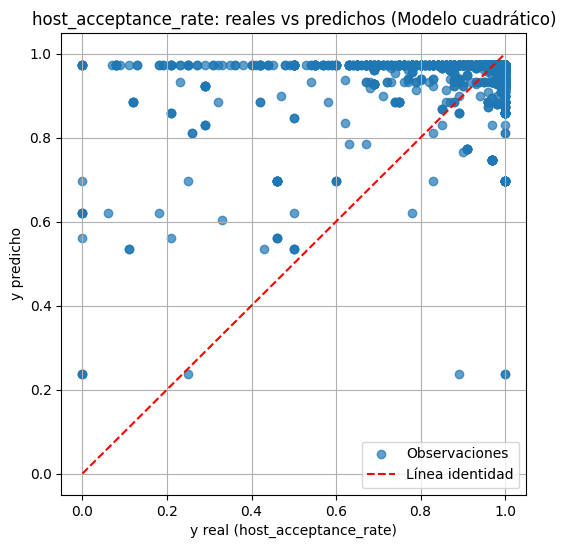

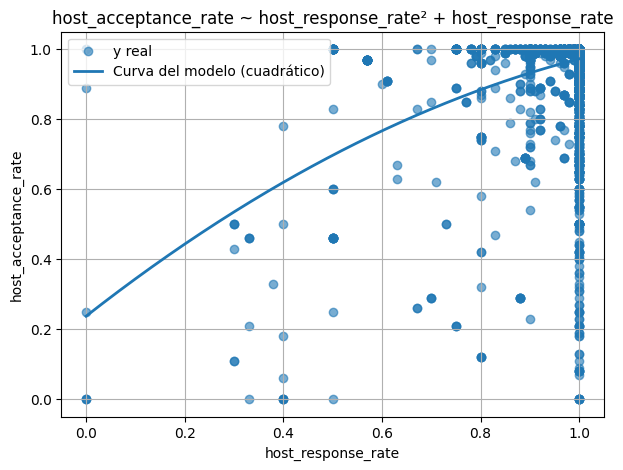


📈 Modelo cuadrático: host_total_listings_count ~ host_listings_count² + host_listings_count
   Correlación: 0.9610
                                OLS Regression Results                               
Dep. Variable:     host_total_listings_count   R-squared:                       0.932
Model:                                   OLS   Adj. R-squared:                  0.932
Method:                        Least Squares   F-statistic:                 5.120e+04
Date:                       Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                               22:01:16   Log-Likelihood:                -26280.
No. Observations:                       7419   AIC:                         5.257e+04
Df Residuals:                           7416   BIC:                         5.259e+04
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                        

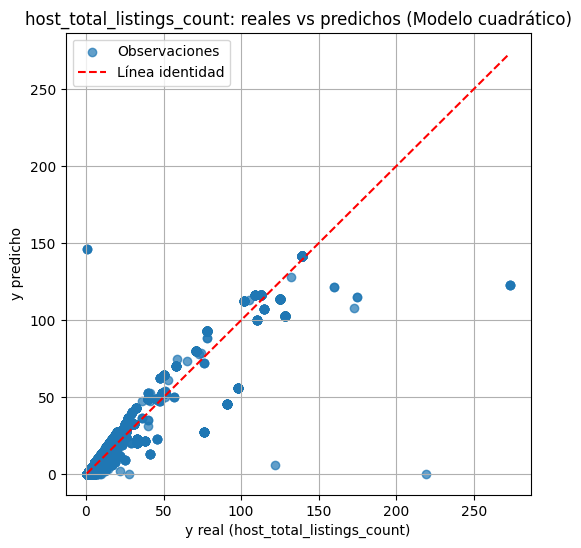

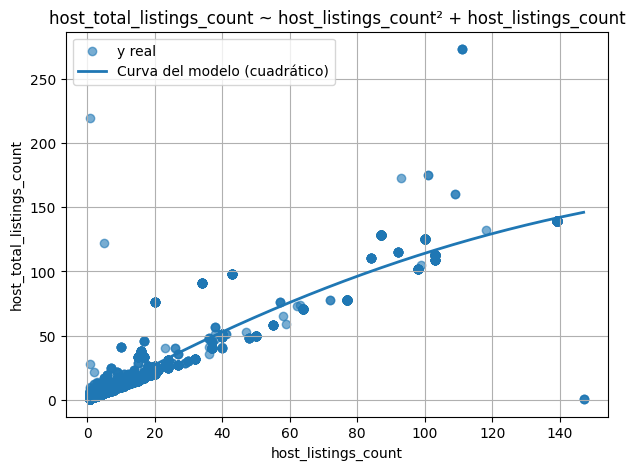


📈 Modelo cuadrático: accommodates ~ bedrooms² + bedrooms
   Correlación: 0.7051
                            OLS Regression Results                            
Dep. Variable:           accommodates   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3717.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:01:16   Log-Likelihood:                -11340.
No. Observations:                7419   AIC:                         2.269e+04
Df Residuals:                    7416   BIC:                         2.271e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

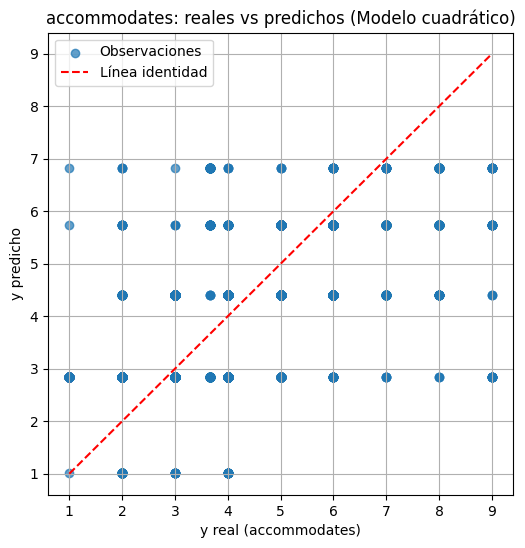

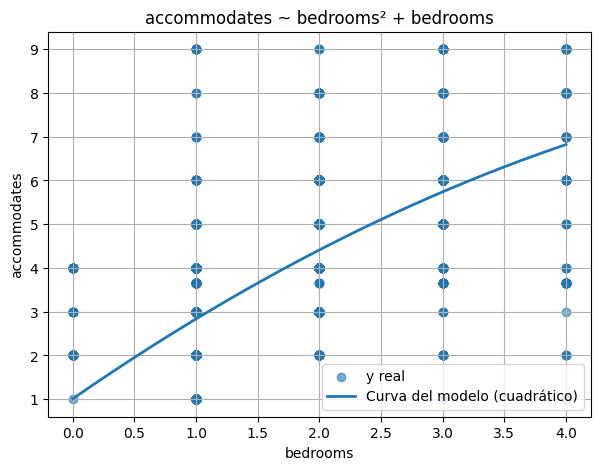


📈 Modelo cuadrático: reviews_per_month ~ number_of_reviews_ltm² + number_of_reviews_ltm
   Correlación: 0.7958
                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     6441.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:01:17   Log-Likelihood:                -10613.
No. Observations:                7419   AIC:                         2.123e+04
Df Residuals:                    7416   BIC:                         2.125e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----

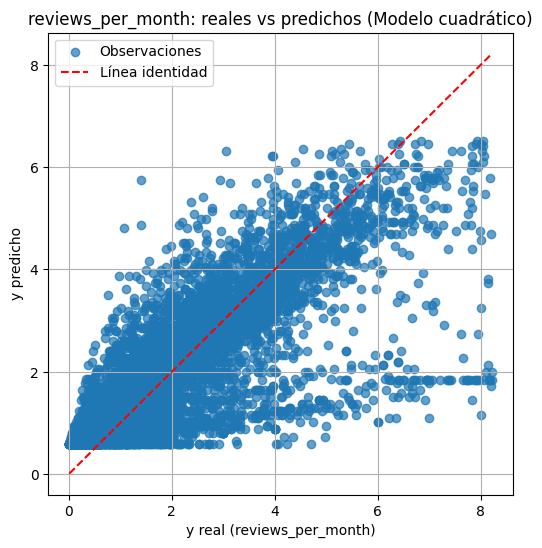

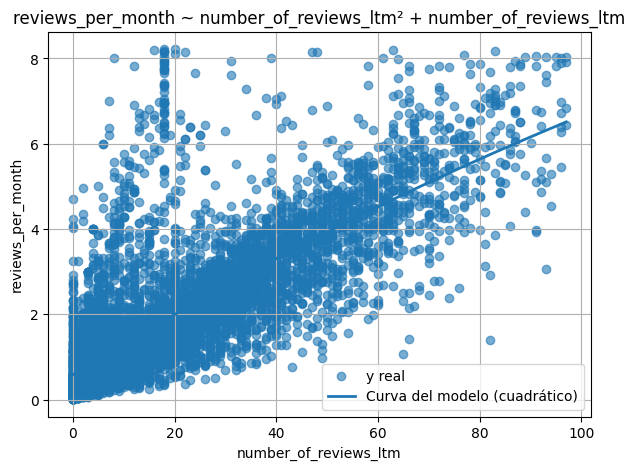


📈 Modelo cuadrático: price ~ bedrooms² + bedrooms
   Correlación: 0.3777
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     685.2
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          8.93e-274
Time:                        22:01:17   Log-Likelihood:                -46579.
No. Observations:                7419   AIC:                         9.316e+04
Df Residuals:                    7416   BIC:                         9.318e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

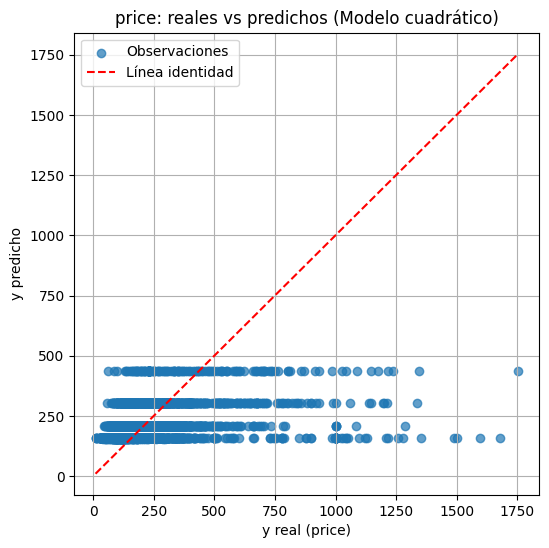

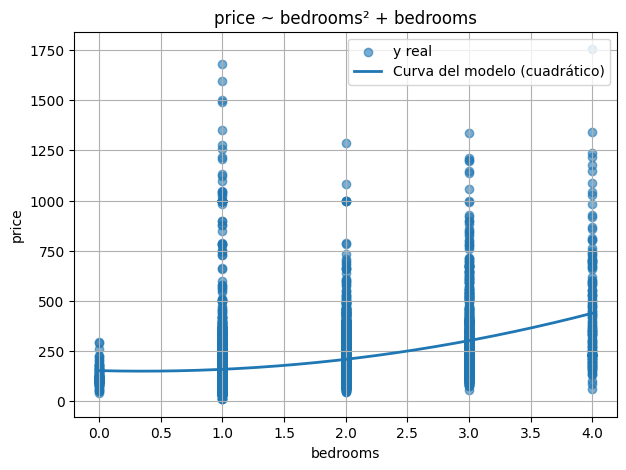

In [103]:
# -------------------------------------------------------------------
# MODELO NO LINEAL 1:
# y = a*x^2 + b*x + c   (CUADRÁTICO, con intercepto)
# -------------------------------------------------------------------

for y_col in target_vars:
    if y_col not in corr_matrix.columns:
        continue

    # Variable con mayor correlación absoluta (excluyendo la propia)
    top_x = corr_matrix[y_col].drop(y_col, errors='ignore').abs().idxmax()
    corr_val = corr_matrix.loc[y_col, top_x]

    print(f"\n======================================")
    print(f"📈 Modelo cuadrático: {y_col} ~ {top_x}² + {top_x}")
    print(f"   Correlación: {corr_val:.4f}")
    print(f"======================================")

    # Subconjunto con las dos variables (desde df_num)
    sub = df_num[[y_col, top_x]].dropna().copy()

    # --- EXCLUSIÓN DE VALORES CENTINELA (por columna específica) ---
    if "sentinel_dict" in globals():
        if y_col in sentinel_dict:
            sub = sub[sub[y_col] != sentinel_dict[y_col]]
        if top_x in sentinel_dict:
            sub = sub[sub[top_x] != sentinel_dict[top_x]]
    # --------------------------------------

    if len(sub) < 5:
        print("⚠️ Insuficientes observaciones tras limpieza, se omite.")
        continue

    sub[f"{top_x}_sq"] = sub[top_x] ** 2
    X = sm.add_constant(sub[[f"{top_x}_sq", top_x]])
    y = sub[y_col]

    modelo_cuadratico = sm.OLS(y, X, missing='drop').fit()
    print(modelo_cuadratico.summary())

    # --- PREDICCIONES ---
    y_hat = modelo_cuadratico.predict(X)

    # --- GRÁFICO 1: Reales vs Predichos ---
    plt.figure(figsize=(6, 6))
    plt.scatter(y, y_hat, alpha=0.7, label="Observaciones")
    lims = [min(y.min(), y_hat.min()), max(y.max(), y_hat.max())]
    plt.plot(lims, lims, 'r--', label="Línea identidad")
    plt.xlabel(f"y real ({y_col})")
    plt.ylabel("y predicho")
    plt.title(f"{y_col}: reales vs predichos (Modelo cuadrático)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # --- GRÁFICO 2: Curva del modelo sobre X ---
    x_plot = np.linspace(sub[top_x].min(), sub[top_x].max(), 300)
    X_plot = pd.DataFrame({
        "const": 1.0,
        f"{top_x}_sq": x_plot ** 2,
        top_x: x_plot
    })
    y_curve = modelo_cuadratico.predict(X_plot)

    plt.figure(figsize=(7, 5))
    plt.scatter(sub[top_x], sub[y_col], alpha=0.6, label="y real")
    plt.plot(x_plot, y_curve, linewidth=2, label="Curva del modelo (cuadrático)")
    plt.xlabel(top_x)
    plt.ylabel(y_col)
    plt.title(f"{y_col} ~ {top_x}² + {top_x}")
    plt.grid(True)
    plt.legend()
    plt.show()


📈 MODELO 2: host_response_rate = (a*host_acceptance_rate² + b)/c * host_acceptance_rate²
   → y = (a/c)*host_acceptance_rate⁴ + (b/c)*host_acceptance_rate²
   Correlación con host_acceptance_rate: 0.3550
                                 OLS Regression Results                                
Dep. Variable:     host_response_rate   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.727e+05
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:37   Log-Likelihood:                          5398.2
No. Observations:                6778   AIC:                                 -1.079e+04
Df Residuals:                    6776   BIC:                                 -1.078e+04
Df Model:                           2                                                  
Cov

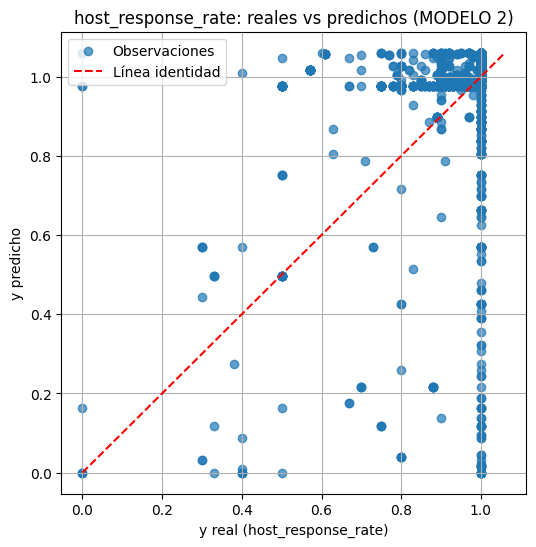

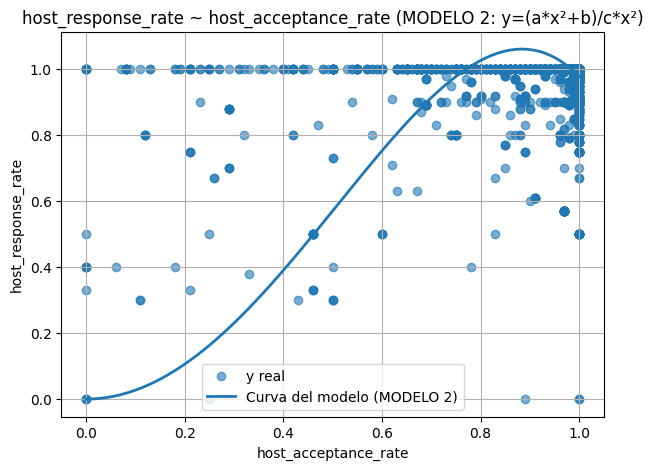


📈 MODELO 2: host_acceptance_rate = (a*host_response_rate² + b)/c * host_response_rate²
   → y = (a/c)*host_response_rate⁴ + (b/c)*host_response_rate²
   Correlación con host_response_rate: 0.3550
                                  OLS Regression Results                                 
Dep. Variable:     host_acceptance_rate   R-squared (uncentered):                   0.987
Model:                              OLS   Adj. R-squared (uncentered):              0.987
Method:                   Least Squares   F-statistic:                          2.594e+05
Date:                  Tue, 07 Oct 2025   Prob (F-statistic):                        0.00
Time:                          22:03:38   Log-Likelihood:                          5330.9
No. Observations:                  6778   AIC:                                 -1.066e+04
Df Residuals:                      6776   BIC:                                 -1.064e+04
Df Model:                             2                                            

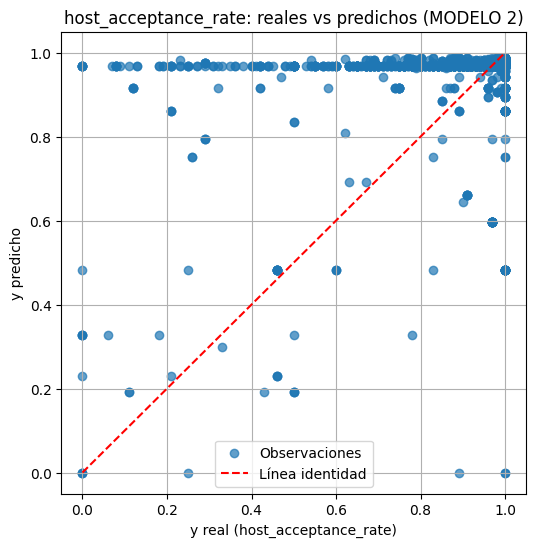

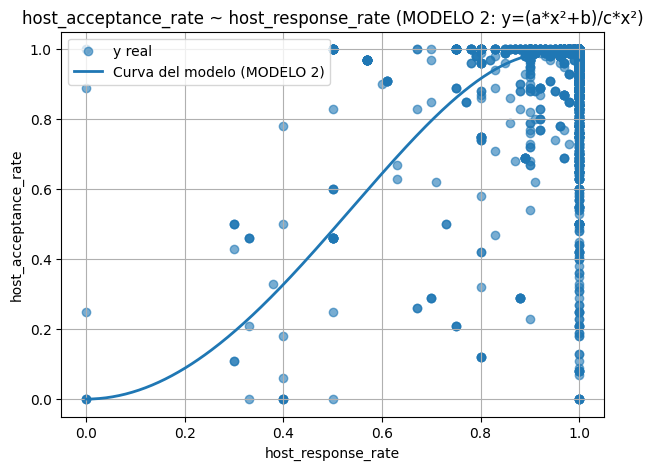


📈 MODELO 2: host_total_listings_count = (a*host_listings_count² + b)/c * host_listings_count²
   → y = (a/c)*host_listings_count⁴ + (b/c)*host_listings_count²
   Correlación con host_listings_count: 0.9610
                                    OLS Regression Results                                    
Dep. Variable:     host_total_listings_count   R-squared (uncentered):                   0.901
Model:                                   OLS   Adj. R-squared (uncentered):              0.901
Method:                        Least Squares   F-statistic:                          3.390e+04
Date:                       Tue, 07 Oct 2025   Prob (F-statistic):                        0.00
Time:                               22:03:38   Log-Likelihood:                         -28572.
No. Observations:                       7419   AIC:                                  5.715e+04
Df Residuals:                           7417   BIC:                                  5.716e+04
Df Model:                        

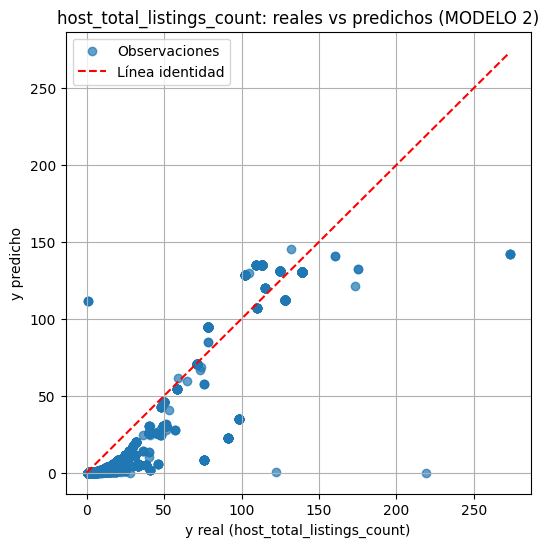

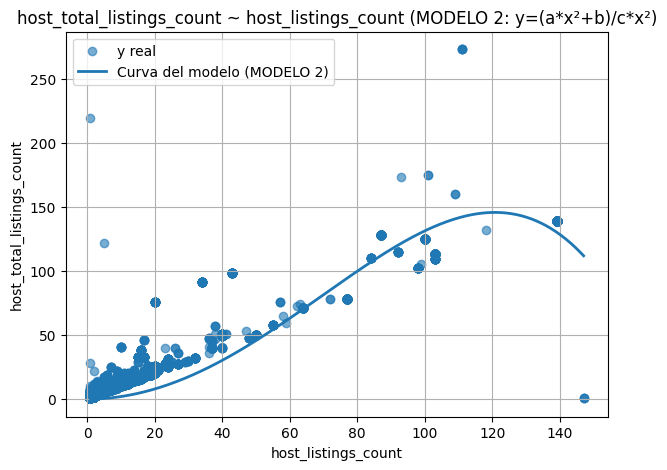


📈 MODELO 2: accommodates = (a*bedrooms² + b)/c * bedrooms²
   → y = (a/c)*bedrooms⁴ + (b/c)*bedrooms²
   Correlación con bedrooms: 0.7051
                                 OLS Regression Results                                
Dep. Variable:           accommodates   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                          1.971e+04
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:38   Log-Likelihood:                         -13985.
No. Observations:                7419   AIC:                                  2.797e+04
Df Residuals:                    7417   BIC:                                  2.799e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                

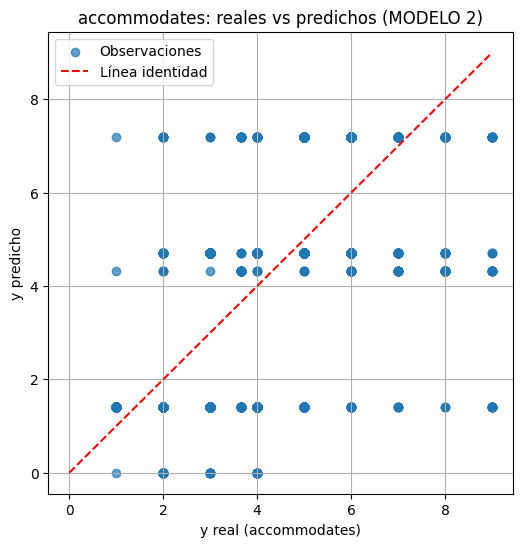

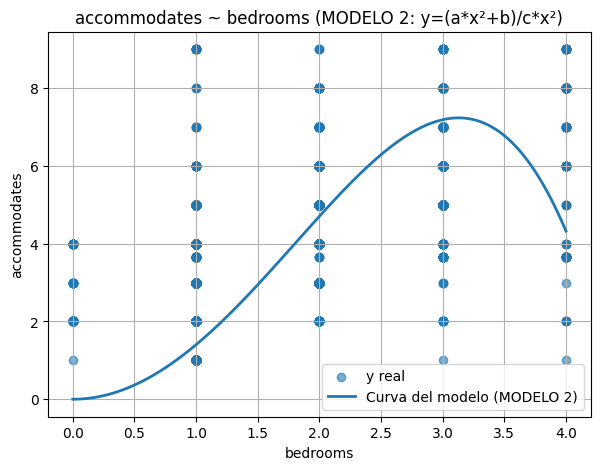


📈 MODELO 2: reviews_per_month = (a*number_of_reviews_ltm² + b)/c * number_of_reviews_ltm²
   → y = (a/c)*number_of_reviews_ltm⁴ + (b/c)*number_of_reviews_ltm²
   Correlación con number_of_reviews_ltm: 0.7958
                                 OLS Regression Results                                
Dep. Variable:      reviews_per_month   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              9269.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:39   Log-Likelihood:                         -12786.
No. Observations:                7419   AIC:                                  2.558e+04
Df Residuals:                    7417   BIC:                                  2.559e+04
Df Model:                           2                                                  

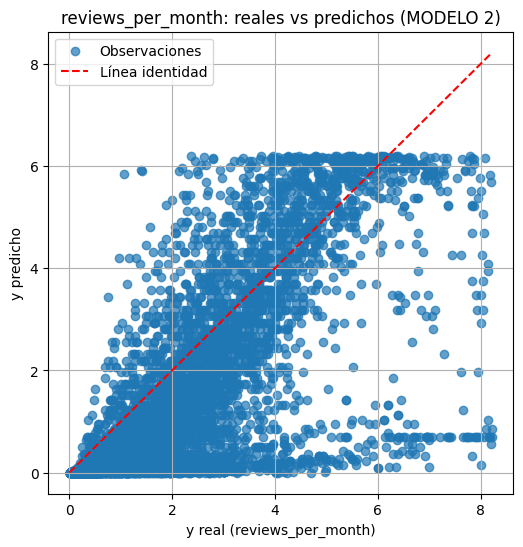

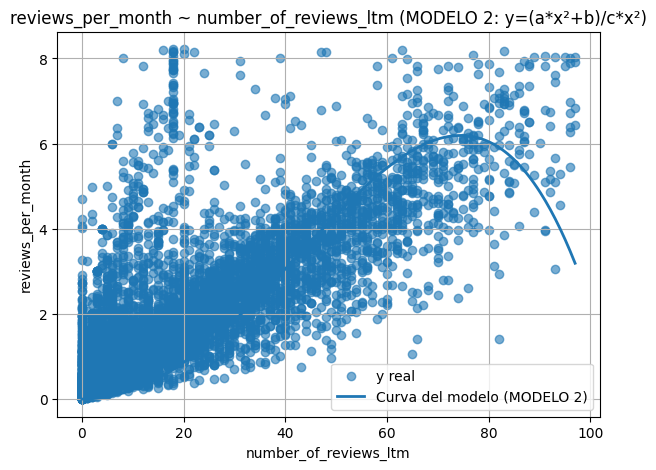


📈 MODELO 2: price = (a*bedrooms² + b)/c * bedrooms²
   → y = (a/c)*bedrooms⁴ + (b/c)*bedrooms²
   Correlación con bedrooms: 0.3777
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              5721.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:39   Log-Likelihood:                         -47714.
No. Observations:                7419   AIC:                                  9.543e+04
Df Residuals:                    7417   BIC:                                  9.545e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                       

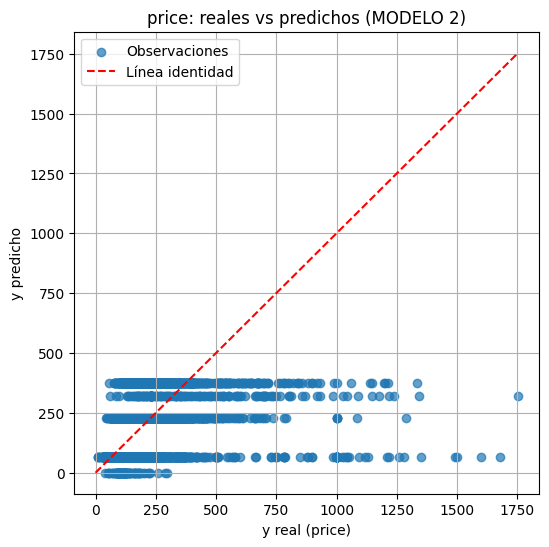

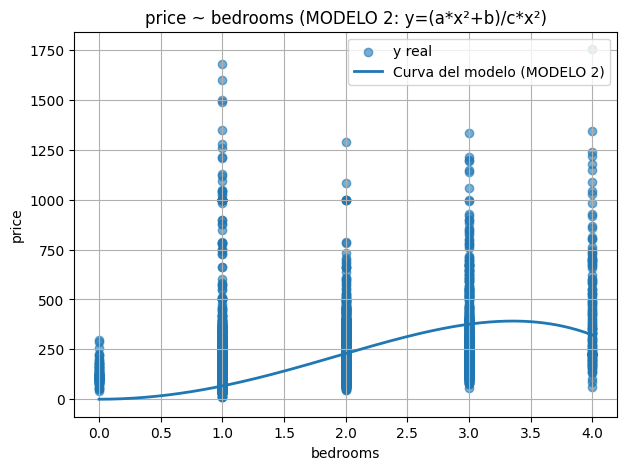

In [106]:
# -------------------------------------------------------------------
# MODELO NO LINEAL 2 (MODELO 2):
# y = (a*x^2 + b)/c * x^2  →  y = (a/c)*x^4 + (b/c)*x^2  (SIN intercepto)
# -------------------------------------------------------------------

for y_col in target_vars:
    if y_col not in corr_matrix.columns:
        continue

    # Variable con mayor correlación absoluta (excluyendo la propia)
    top_x = corr_matrix[y_col].drop(y_col, errors='ignore').abs().idxmax()
    corr_val = corr_matrix.loc[y_col, top_x]

    print(f"\n====================================================================")
    print(f"📈 MODELO 2: {y_col} = (a*{top_x}² + b)/c * {top_x}²")
    print(f"   → y = (a/c)*{top_x}⁴ + (b/c)*{top_x}²")
    print(f"   Correlación con {top_x}: {corr_val:.4f}")
    print(f"====================================================================")

    # Subconjunto con las dos variables (desde df_num)
    sub = df_num[[y_col, top_x]].dropna().copy()

    # --- EXCLUSIÓN DE VALORES CENTINELA (por columna específica) ---
    if "sentinel_dict" in globals():
        if y_col in sentinel_dict:
            sub = sub[sub[y_col] != sentinel_dict[y_col]]
        if top_x in sentinel_dict:
            sub = sub[sub[top_x] != sentinel_dict[top_x]]
    # --------------------------------------

    if len(sub) < 5:
        print("⚠️ Insuficientes observaciones tras limpieza, se omite.")
        continue

    # Construcción de términos x² y x⁴
    sub[f"{top_x}_sq"] = sub[top_x] ** 2
    sub[f"{top_x}_4"]  = sub[top_x] ** 4

    # Matriz de diseño SIN intercepto
    X = sub[[f"{top_x}_4", f"{top_x}_sq"]]
    y = sub[y_col]

    # Ajuste del MODELO 2 (sin constante)
    modelo_2 = sm.OLS(y, X, missing='drop').fit()
    print(modelo_2.summary())

    # Predicciones
    y_hat = modelo_2.predict(X)

    # --- GRÁFICO 1: Reales vs Predichos ---
    plt.figure(figsize=(6,6))
    plt.scatter(y, y_hat, alpha=0.7, label="Observaciones")
    lims = [min(y.min(), y_hat.min()), max(y.max(), y_hat.max())]
    plt.plot(lims, lims, 'r--', label="Línea identidad")
    plt.xlabel(f"y real ({y_col})")
    plt.ylabel("y predicho")
    plt.title(f"{y_col}: reales vs predichos (MODELO 2)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- GRÁFICO 2: Curva del modelo sobre x ---
    x_plot = np.linspace(sub[top_x].min(), sub[top_x].max(), 300)
    X_plot = pd.DataFrame({
        f"{top_x}_4": x_plot ** 4,
        f"{top_x}_sq": x_plot ** 2
    })
    y_curve = modelo_2.predict(X_plot)

    plt.figure(figsize=(7,5))
    plt.scatter(sub[top_x], sub[y_col], alpha=0.6, label="y real")
    plt.plot(x_plot, y_curve, linewidth=2, label="Curva del modelo (MODELO 2)")
    plt.xlabel(top_x)
    plt.ylabel(y_col)
    plt.title(f"{y_col} ~ {top_x} (MODELO 2: y=(a*x²+b)/c*x²)")
    plt.grid(True)
    plt.legend()
    plt.show()

In [107]:
# -------------------------------------------------------------------
# TABLA COMPARATIVA: LINEAL vs CUADRÁTICO vs MODELO 2
# (solo corr_y_x y R² de cada modelo)
# -------------------------------------------------------------------

comparativa = []

for y_col in target_vars:
    if y_col not in corr_matrix.columns:
        continue

    # Predictor más correlacionado
    top_x = corr_matrix[y_col].drop(y_col, errors='ignore').abs().idxmax()

    # Subconjunto desde df_num
    sub = df_num[[y_col, top_x]].dropna().copy()

    # --- EXCLUSIÓN DE VALORES CENTINELA (por columna específica) ---
    if "sentinel_dict" in globals():
        if y_col in sentinel_dict:
            sub = sub[sub[y_col] != sentinel_dict[y_col]]
        if top_x in sentinel_dict:
            sub = sub[sub[top_x] != sentinel_dict[top_x]]
    # --------------------------------------

    sub = sub.replace([np.inf, -np.inf], np.nan).dropna(subset=[y_col, top_x])
    if len(sub) < 5:
        continue

    # Correlación base (y vs x)
    corr_y_x = float(sub[y_col].corr(sub[top_x]))
    y = sub[y_col]

    # Lineal
    X_lin = sm.add_constant(sub[[top_x]])
    r2_lineal = float(sm.OLS(y, X_lin, missing='drop').fit().rsquared)

    # Cuadrático
    sub[f"{top_x}_sq"] = sub[top_x] ** 2
    X_quad = sm.add_constant(sub[[f"{top_x}_sq", top_x]])
    r2_cuadratico = float(sm.OLS(y, X_quad, missing='drop').fit().rsquared)

    # MODELO 2 (sin intercepto)
    sub[f"{top_x}_4"] = sub[top_x] ** 4
    X_mod2 = sub[[f"{top_x}_4", f"{top_x}_sq"]]
    r2_mod2 = float(sm.OLS(y, X_mod2, missing='drop').fit().rsquared)

    comparativa.append({
        "target": y_col,
        "predictor": top_x,
        "corr_y_x": corr_y_x,
        "r2_lineal": r2_lineal,
        "r2_cuadratico": r2_cuadratico,
        "r2_mod2": r2_mod2
    })

# --- TABLA FINAL ---
tabla_comparativa = pd.DataFrame(comparativa, columns=[
    "target", "predictor", "corr_y_x",
    "r2_lineal", "r2_cuadratico", "r2_mod2"
])

print("\n===================== TABLA COMPARATIVA =====================\n")
display(tabla_comparativa)


===================== TABLA COMPARATIVA =====================



,target,predictor,corr_y_x,r2_lineal,r2_cuadratico,r2_mod2
0,host_response_rate,host_acceptance_rate,0.354989,0.126017,0.134648,0.987728
1,host_acceptance_rate,host_response_rate,0.354989,0.126017,0.130351,0.987107
2,host_total_listings_count,host_listings_count,0.960967,0.923457,0.932471,0.901395
3,accommodates,bedrooms,0.705102,0.497169,0.500625,0.841647
4,reviews_per_month,number_of_reviews_ltm,0.795793,0.633286,0.634657,0.714235
5,price,bedrooms,0.377667,0.142633,0.155962,0.606712
